In [25]:
from dataloader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = None
from Struct import Struct

In [26]:
structures, sources = DataLoader.load_data(75).values()

unpickling from data/saved/threshold/75.pkl


# Stats de base sur les noeuds
## Noeuds par:
- nombre de parents
- nombre d'enfants
- position dans la structure (source, interne, feuille, calculé seulement pour les structures hiérarchiques)
- niveau du noeud
## Sources par:
- niveau de la source

In [27]:
base_stats_node = {
    "parents": structures["df"].parents.map(lambda x: len(x.reduction())).value_counts().sort_index(),
    "children": structures["df"].children.map(lambda x: len(x.reduction())).value_counts().sort_index(),
    "kind": structures["hierarchical"].kind.value_counts().sort_index(),
    "level": structures["df"].level.value_counts().sort_index(),
    "sources": structures["df"][structures["df"].kind == 1].level.value_counts().sort_index()
}

In [28]:
base_stats_node["kind"].index = base_stats_node["kind"].index.map(
    lambda x: ["isolés", "sources", "internes", "feuilles"][x])

## Test de deux courbes sur le meme plot

In [29]:
#base_stats_node["level"].plot(style="-o")
#base_stats_node["sources"].plot(style="-o")
#plt.show()

#plt.clf()
#base_stats_node["children"].plot(style="-o")
#base_stats_node["parents"].plot(style="-o")
#plt.show()

## Plot des stats

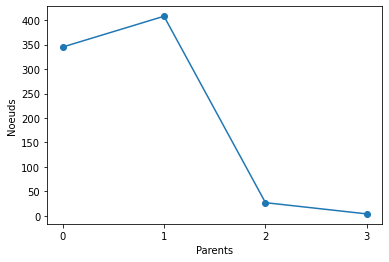

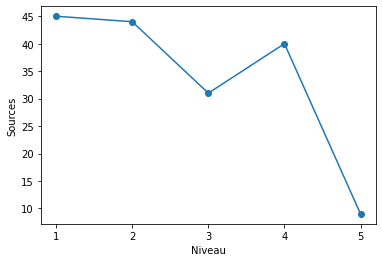

In [30]:
plt.clf()
ax = base_stats_node["parents"].plot(style="-o")
ax.set_xlabel("Parents")
ax.set_ylabel("Noeuds")
plt.xticks([0, 1, 2, 3])
plt.savefig("images/plots/noeuds/noeuds_nombre_de_parents.pdf")
plt.show()

plt.clf()
ax = base_stats_node["children"].plot(style="-o")
ax.set_xlabel("Enfants")
ax.set_ylabel("Noeuds")
plt.savefig("images/plots/noeuds/noeuds_nombre_d_enfants.pdf")

plt.clf()
#ax = base_stats_node["kind"].plot(style="-o")
plt.tight_layout()
ax = base_stats_node["kind"].plot.pie()
ax.set_ylabel("")
plt.savefig("images/plots/noeuds/noeuds_type.pdf")

plt.clf()
ax = base_stats_node["level"].plot(style="-o")
ax.set_xlabel("Niveau")
ax.set_ylabel("Noeuds")
plt.savefig("images/plots/noeuds/noeuds_niveau.pdf")

plt.clf()
ax = base_stats_node["sources"].plot(style="-o")
plt.xticks([1, 2, 3, 4, 5])
ax.set_xlabel("Niveau")
ax.set_ylabel("Sources")
plt.savefig("images/plots/noeuds/sources_niveau.pdf")


# Stats de base sur les structures

In [31]:
getbasestats = lambda: structures["hierarchical"].groupby(level=[0]).apply(lambda s: Struct(s, s.index[0][0], 75).stats())
base_stats_struct = getbasestats()

In [32]:
print(base_stats_struct[base_stats_struct.def_trans > 0].def_trans)

struct
1     1.0
3     1.0
5     2.0
9     3.0
20    3.0
42    1.0
Name: def_trans, dtype: float64


# Stats sur les sources

In [33]:
getstats = lambda: sources["hierarchical"].groupby(level=[0, 1]).apply(lambda s: Struct(s, s.index[0][0:2], 75).stats())
src_stats = getstats()
full_stats = getstats()

## Vue

In [34]:
src_stats.sort_values("mesure1")

,,fractalite,mesure1,mesure2,mesure_min,mesure_sum,etoiles_prop,etoiles_et_puits_prop,etoiles_nbr,puits_nbr,def_trans,apport_prive
struct,sourceid,,,,,,,,,,,
18,629,1.000000,1.043081e-07,0.666667,1.043081e-07,0.666667,0.500000,1.000000,1.0,2.0,0.0,0.750000
5,752,1.381532,5.644361e-02,0.632464,5.644361e-02,0.688908,0.000000,1.000000,0.0,4.0,2.0,1.000000
10,783,1.098991,9.678493e-02,0.189111,9.678493e-02,0.285896,1.000000,1.000000,2.0,2.0,0.0,1.000000
6,753,1.257155,1.085567e-01,0.386039,1.085567e-01,0.494595,0.666667,1.000000,2.0,3.0,0.0,1.000000
8,748,1.098991,1.155481e-01,0.348499,1.155481e-01,0.464047,0.500000,1.000000,1.0,2.0,0.0,0.857143
11,747,1.098991,1.155481e-01,0.358442,1.155481e-01,0.473990,0.500000,1.000000,1.0,2.0,0.0,1.000000
7,742,1.098991,1.155481e-01,0.348499,1.155481e-01,0.464047,0.500000,1.000000,1.0,2.0,0.0,0.857143
23,679,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
21,687,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000


## Filtres

In [35]:
src_stats = full_stats[full_stats.fractalite > 0.6]
print(f"{full_stats.index.shape[0] - src_stats.index.shape[0]} noeuds filtrés")

1 noeuds filtrés


## Plot des stats

'\nfor x, y, lx, ly in stats_for_plot_annexe:\n    save_stat(x, y, lx, ly, "x_")\n'

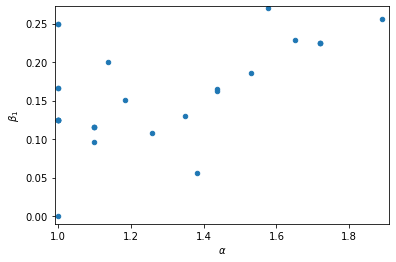

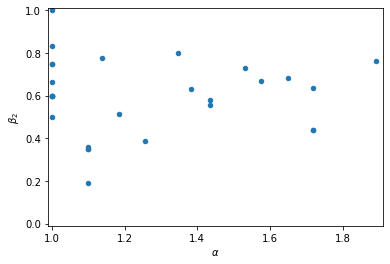

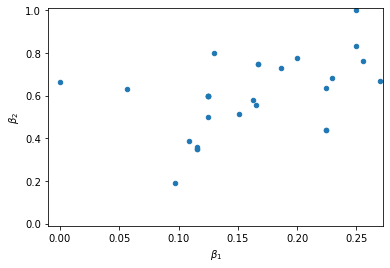

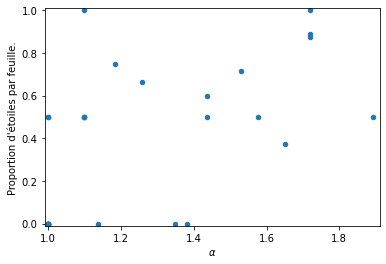

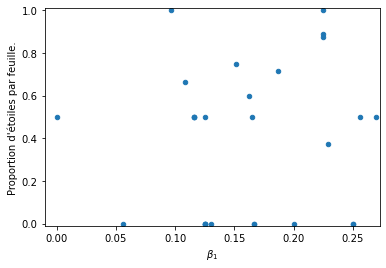

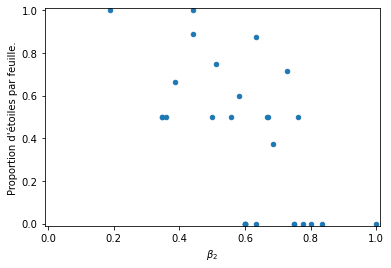

In [36]:
stats_for_plot = [
    ("fractalite", "mesure1", r"$\alpha$", r"$\beta_1$", 1),
    ("fractalite", "mesure2", r"$\alpha$", r"$\beta_2$", 1),
    ("mesure1", "mesure2", r"$\beta_1$", r"$\beta_2$", 0),
    ("fractalite", "etoiles_prop", r"$\alpha$", "Proportion d'étoiles par feuille.", 1),
    ("mesure1", "etoiles_prop", r"$\beta_1$", "Proportion d'étoiles par feuille.", 0),
    ("mesure2", "etoiles_prop", r"$\beta_2$", "Proportion d'étoiles par feuille.", 0),
]

stats_for_plot_annexe = [
    ("fractalite", "mesure_min", r"$\alpha$", "Mesure min", 1),
    ("mesure_min", "etoiles_prop", "Mesure min", "Proportion d'étoiles par feuille.", 0),
    ("mesure_sum", "etoiles_prop", "Mesure sum", "Proportion d'étoiles par feuille.", 0),
    ("fractalite", "etoiles_et_puits_prop", r"$\alpha$", "Proportion d'étoiles et de puits de niveau 5 par feuille.", 1),
    ("mesure1", "etoiles_et_puits_prop", r"$\beta_1$", "Proportion d'étoiles et de puits de niveau 5 par feuille.", 0),
    ("mesure2", "etoiles_et_puits_prop", r"$\beta_2$", "Proportion d'étoiles et de puits de niveau 5 par feuille.", 0),
    ("mesure_min", "etoiles_et_puits_prop", "Mesure min", "Proportion d'étoiles et de puits de niveau 5 par feuille.", 0),
]

def save_stat(x, y, lx, ly, xl, prefix):
    ax = src_stats.plot.scatter(x=x, y=y, xlim=[xl-0.01, src_stats[x].max() * 1.01],
                                ylim=[-0.01, src_stats[y].max() * 1.01])
    ax.set_xlabel(lx)
    ax.set_ylabel(ly)
    for k, v in src_stats[[x,y]].iterrows():
        pass
        #ax.annotate(k[1],v)
    plt.savefig(f"images/plots/sources/{prefix}{y}_{x}.pdf")


for x, y, lx, ly, xl in stats_for_plot:
    save_stat(x, y, lx, ly, xl, "")

'''
for x, y, lx, ly in stats_for_plot_annexe:
    save_stat(x, y, lx, ly, "x_")
'''


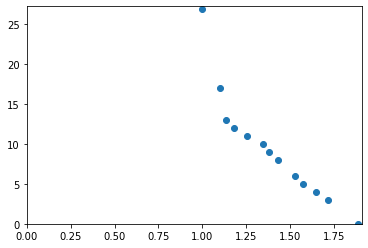

In [37]:
plt.xlim([0, src_stats.fractalite.max() * 1.01])
plt.ylim([0, (src_stats.shape[0] - 1) * 1.01])
frac_last = src_stats.groupby("fractalite").count().mesure1.sort_index(ascending=False).cumsum()
#plt.scatter(list(src_stats.fractalite.sort_values(ascending=False)), [*range(src_stats.shape[0])])
plt.scatter(list(frac_last.index), list(frac_last - 1))
plt.savefig(f"images/plots/sources/fractalites_cumulees.pdf")
#plt.scatter(list(src_stats.mesure2.sort_values(ascending=False)) + [0], [*range(src_stats.shape[0])] + [0])

In [38]:
src_stats.sort_values("fractalite", ascending=True)

,,fractalite,mesure1,mesure2,mesure_min,mesure_sum,etoiles_prop,etoiles_et_puits_prop,etoiles_nbr,puits_nbr,def_trans,apport_prive
struct,sourceid,,,,,,,,,,,
0,723,1.000000,1.250001e-01,0.500000,1.250001e-01,0.625000,0.500000,0.500000,1.0,2.0,0.0,0.200000
41,607,1.000000,1.666668e-01,0.750000,1.666668e-01,0.916667,0.000000,1.000000,0.0,2.0,0.0,1.000000
23,679,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
21,687,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
20,693,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,3.0,1.000000
19,736,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
18,629,1.000000,1.043081e-07,0.666667,1.043081e-07,0.666667,0.500000,1.000000,1.0,2.0,0.0,0.750000
13,768,1.000000,2.500001e-01,0.833333,2.500001e-01,1.083333,0.000000,0.000000,0.0,3.0,0.0,1.000000
42,606,1.000000,1.666668e-01,0.750000,1.666668e-01,0.916667,0.000000,0.500000,0.0,2.0,1.0,1.000000


In [39]:
src_cumsum = src_stats[["fractalite", "etoiles_nbr", "puits_nbr"]].sort_values("fractalite", ascending=True).cumsum()
src_cumsum.fractalite = src_stats.fractalite.sort_values(ascending=True)
src_cumsum_last = src_cumsum.groupby("fractalite").last()
xs = list(src_cumsum_last.index)
ys = list(src_cumsum_last.etoiles_nbr / src_cumsum_last.puits_nbr)

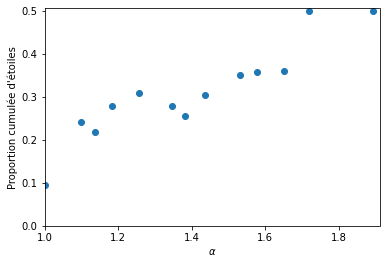

In [40]:
plt.xlim([1, max(xs) * 1.01])
plt.ylim([0, max(ys) * 1.01])
plt.scatter(xs, ys)
plt.xlabel(r"$\alpha$")
plt.ylabel("Proportion cumulée d'étoiles")
plt.savefig("images/plots/sources/etoiles_puits_cumule.pdf")

In [41]:
src_cumsum_desc = src_stats[["fractalite", "etoiles_nbr", "puits_nbr"]].sort_values("fractalite",
                                                                                    ascending=False).cumsum()
src_cumsum_desc.fractalite = src_stats.fractalite.sort_values(ascending=False)
src_cumsum_desc_last = src_cumsum_desc.groupby("fractalite").last()
xs_desc = list(src_cumsum_desc_last.index)
ys_desc = list(src_cumsum_desc_last.etoiles_nbr / src_cumsum_desc_last.puits_nbr)

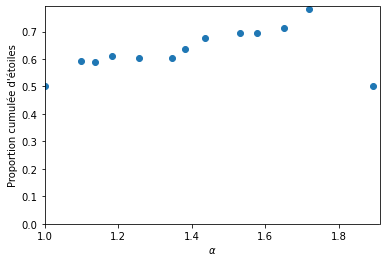

In [42]:
plt.xlim([1, max(xs_desc) * 1.01])
plt.ylim([0, max(ys_desc) * 1.01])
plt.scatter(xs_desc, ys_desc)
plt.xlabel(r"$\alpha$")
plt.ylabel("Proportion cumulée d'étoiles")
plt.savefig("images/plots/sources/etoiles_puits_cumule_desc.pdf")

In [43]:
print([xs[i]+x for i,x in enumerate(xs[:-1])])

[1.9999998807907104, 2.1979812383651733, 2.274448275566101, 2.366904377937317, 2.5143100023269653, 2.6947351694107056, 2.7630633115768433, 2.8703657388687134, 3.060229182243347, 3.1525403261184692, 3.299937129020691, 3.4380420446395874]


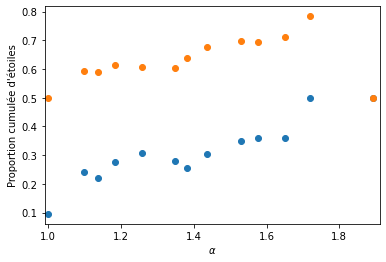

In [44]:
plt.xlim([0.99, max([max(xs), max(xs_desc)]) * 1.01])
plt.scatter(xs, ys)
plt.scatter(xs_desc, ys_desc)
#plt.scatter(xs[:-1], [e - ys[i - 1] for i, e in enumerate(ys_desc[1:])])
#plt.scatter([(xs[i]+x)/2 for i,x in enumerate(xs[:-1])], [e - ys[i] for i, e in enumerate(ys_desc[1:])], s=4)
plt.xlabel(r"$\alpha$")
plt.ylabel("Proportion cumulée d'étoiles")

plt.show()
# plt.savefig("images/plots/sources/etoiles_puits_cumule_combined.pdf")

In [45]:
src_cumsum_filter = src_stats.loc[src_stats.fractalite > 1.04, ["fractalite", "etoiles_nbr", "puits_nbr"]].sort_values(
    "fractalite", ascending=True).cumsum()
src_cumsum_filter.fractalite = src_stats.fractalite[src_stats.fractalite > 1.04].sort_values(ascending=True)

src_cumsum_desc_filter = src_stats.loc[
    src_stats.fractalite > 1.04, ["fractalite", "etoiles_nbr", "puits_nbr"]].sort_values("fractalite",
                                                                                         ascending=False).cumsum()
src_cumsum_desc_filter.fractalite = src_stats.fractalite[src_stats.fractalite > 1.04].sort_values(ascending=False)

src_cumsum_last_filter = src_cumsum_filter.groupby("fractalite").last()
xs_filter = list(src_cumsum_last_filter.index)
ys_filter = list(src_cumsum_last_filter.etoiles_nbr / src_cumsum_last_filter.puits_nbr)

src_cumsum_desc_last_filter = src_cumsum_desc_filter.groupby("fractalite").last()
xs_desc_filter = list(src_cumsum_desc_last_filter.index)
ys_desc_filter = list(src_cumsum_desc_last_filter.etoiles_nbr / src_cumsum_desc_last_filter.puits_nbr)


In [46]:
#plt.xlim([1, max([max(xs_filter), max(xs_desc_filter)]) * 1.01])
#plt.scatter(xs_filter, ys_filter)
#plt.scatter(xs_desc_filter, ys_desc_filter)
#plt.scatter(xs_filter[:-1],[e - ys_filter[i-1] for i,e in enumerate(ys_desc_filter[1:])])

In [47]:
src_cumsum_filter

,,fractalite,etoiles_nbr,puits_nbr
struct,sourceid,,,
10,783,1.098991,2.0,2.0
8,748,1.098991,3.0,4.0
7,742,1.098991,4.0,6.0
11,747,1.098991,5.0,8.0
17,686,1.137224,5.0,11.0
4,756,1.183452,8.0,15.0
6,753,1.257155,10.0,18.0
9,708,1.347368,10.0,22.0
5,752,1.381532,10.0,26.0


In [54]:
src_stats.sort_values(["fractalite", "mesure2"])

,,fractalite,mesure1,mesure2,mesure_min,mesure_sum,etoiles_prop,etoiles_et_puits_prop,etoiles_nbr,puits_nbr,def_trans,apport_prive
struct,sourceid,,,,,,,,,,,
0,723,1.000000,1.250001e-01,0.500000,1.250001e-01,0.625000,0.500000,0.500000,1.0,2.0,0.0,0.200000
20,693,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,3.0,1.000000
23,679,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
19,736,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
21,687,1.000000,1.250001e-01,0.600000,1.250001e-01,0.725000,0.000000,1.000000,0.0,2.0,0.0,1.000000
18,629,1.000000,1.043081e-07,0.666667,1.043081e-07,0.666667,0.500000,1.000000,1.0,2.0,0.0,0.750000
42,606,1.000000,1.666668e-01,0.750000,1.666668e-01,0.916667,0.000000,0.500000,0.0,2.0,1.0,1.000000
41,607,1.000000,1.666668e-01,0.750000,1.666668e-01,0.916667,0.000000,1.000000,0.0,2.0,0.0,1.000000
13,768,1.000000,2.500001e-01,0.833333,2.500001e-01,1.083333,0.000000,0.000000,0.0,3.0,0.0,1.000000


In [49]:
levelfigs = [DataLoader.to_structs(sources["hierarchical"].loc[42][sources["hierarchical"].loc[42].level == i]) for i in range(3,6)]

In [50]:
levelfigs = [DataLoader.to_structs(sources["hierarchical"].loc[2][sources["hierarchical"].loc[2].level == i]) for i in range(1,7)]

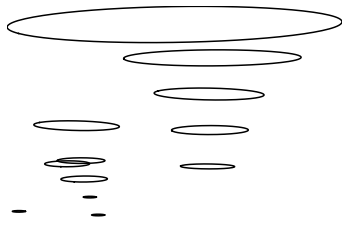

In [51]:
from Node import Node
import pickle

with open("data/dataset/Nodes.pkl", "rb") as f:
    nodes = [Node(k, n) for k, n in pickle.load(f).items()]

xmax, ymax, xmin, ymin = 0,0,1000,1000

for f in levelfigs:
    for n in list(f[760].struct.index):
        x = nodes[n].polygon.exterior.xy[0]
        y = nodes[n].polygon.exterior.xy[1]
        if max(x) > xmax:
            xmax = max(x)
        if max(y) > ymax:
            ymax = max(y)
        if min(x) < xmin:
            xmin = min(x)
        if min(y) < ymin:
            ymin = min(y)

diff = (ymax-ymin)/6

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.axis("off")
for f in levelfigs:
    lvl = 0
    for n in list(f[760].struct.index):
        lvl = nodes[n].level
        x,y = nodes[n].polygon.exterior.xy

        plt.plot(*(x,[((yi-ymin)/6)+ymin+diff*(6-lvl) for yi in y]) , "k")
plt.savefig(f"rapport/images/objects/760.png")
plt.show()

In [52]:
print(src_cumsum_filter.groupby(level=0).count().fractalite.value_counts())

1    10
3     2
2     1
Name: fractalite, dtype: int64


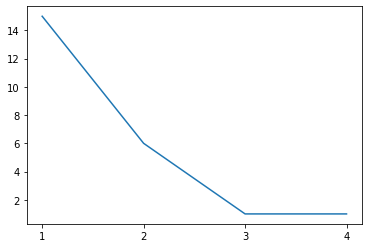

In [53]:
plt.xticks([1,2,3,4])
structures["hierarchical"][structures["hierarchical"].kind == 1].groupby(level=0).count().kind.value_counts().sort_index(ascending=False).plot()
plt.savefig("rapport/images/plots/sources_struct.png")